In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("datasets/data.csv")
df = df.astype({"text": str})
df.head(50)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [5]:
def get_number_of_exclamation(text):
    count = text.count("!")
    return count

In [6]:
def get_number_of_Cap(text):
    return sum(1 for c in text if c.isupper())

In [7]:
def get_number_of_Space(text):
    return sum(1 for c in text if c==" ")

In [8]:
def num_Sentence(text):
    return sum(1 for c in text if c==".")

In [9]:
def num_num(text):
    sum = 0
    for i in range (len(text)-1):
        if text[i].isdigit() and (not text[i+1].isdigit()):
            sum+=1
    return sum

In [10]:
def have_author(text):
    if text != text:
        return 0
    else:
        return 1

In [12]:
df["Score"] = df['text'].apply(get_sentiment_score)

In [13]:
df["!"] = df['text'].apply(get_number_of_exclamation)

In [14]:
df["Upper"] = df['text'].apply(get_number_of_Cap)

In [15]:
df["Space"] = df['text'].apply(get_number_of_Space)

In [16]:
df["num_sentence"] = df['text'].apply(num_Sentence)

In [17]:
df["num_num"] = df['text'].apply(num_num)

In [18]:
df["have_author"] = df['author'].apply(have_author)

In [19]:
df.head(50)

,id,title,author,text,label,Score,!,Upper,Space,num_sentence,num_num,have_author
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,0.006777,0,210,819,37,8,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0.100880,0,105,726,30,10,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0.056258,0,226,1265,69,9,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0.017497,0,130,558,28,13,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,-0.012500,0,21,153,5,3,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,0.144036,1,45,205,18,0,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,0.183651,1,85,488,22,12,0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,0.077046,0,118,848,53,14,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,0.203057,0,186,1451,72,7,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,0.040680,1,398,1772,174,14,1


In [20]:
data = df.loc[:,['Score','!','Upper','Space','num_sentence','num_num','have_author']]
labels = df.loc[:,['label']]

Best K:  23


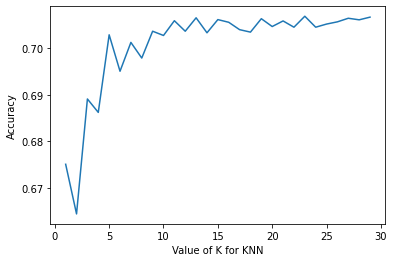

In [21]:
# k range
k_value_range = range(1,30)
# reult score
k_value_scores = []
K = 0
for k in k_value_range:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    accuracy = cross_val_score(knn_model, data, labels.values.ravel(), cv=10, scoring="accuracy")
    #print("K:", k)
    #print("Accuracy: ", accuracy.mean())
    k_value_scores.append(accuracy.mean())
    #print(k_value_scores)
print("Best K: " ,k_value_scores.index(max(k_value_scores))+1)

K = k_value_scores.index(max(k_value_scores))+1

plt.plot(k_value_range, k_value_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, labels.values.ravel(), test_size=0.25, random_state=1)

In [23]:
X_train.head()

,Score,!,Upper,Space,num_sentence,num_num,have_author
8202,0.145915,0,176,1230,82,12,1
16495,0.165301,1,266,1346,88,5,1
790,0.016815,0,86,667,39,7,1
6660,0.038261,5,63,365,24,4,1
11804,-0.058744,0,88,693,45,28,1


In [24]:
X_test.head()

,Score,!,Upper,Space,num_sentence,num_num,have_author
17920,0.131130,0,67,1264,57,1,1
6863,0.077583,0,88,422,15,10,1
20377,0.083581,0,264,1745,91,20,1
5473,0.088470,0,229,1586,92,23,1
7102,-0.225000,0,27,86,6,4,1


In [25]:
print(y_train)

[0 0 1 ... 0 0 1]


In [26]:
print(y_test)

[0 1 0 ... 0 0 0]


In [27]:
neigh = KNeighborsClassifier(n_neighbors=K)  
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [28]:
neigh.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_expect = y_test
y_predict = neigh.predict(X_test)
(y_expect==y_predict).mean()

0.7059615384615384

In [30]:
print(metrics.classification_report(y_expect,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.75      0.71      2568
           1       0.73      0.67      0.70      2632

    accuracy                           0.71      5200
   macro avg       0.71      0.71      0.71      5200
weighted avg       0.71      0.71      0.71      5200

